In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

include/    tests/            testsDescompressed/  triePrefixada.cpp*
relatorio/  testsCompressed/  trie*


In [3]:
cd relatorio/

/mnt/c/Users/Lucas/Downloads/CompresaoLZW/relatorio


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
dados = pd.read_json("dados.json")

In [5]:
dados.head()

,maxBits,tamanhoDicionario,taxa,tempo,tipo
0,9,185364,62.282113,430,Compressão
1,9,185364,165.126196,158,Descompressão
2,9,2871,95.582010,138,Compressão
3,9,2871,2163.472647,8,Descompressão
4,9,1464993,77.659806,7811,Compressão


In [6]:
dados.shape

(56, 5)

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   maxBits            56 non-null     int64  
 1   tamanhoDicionario  56 non-null     int64  
 2   taxa               56 non-null     float64
 3   tempo              56 non-null     int64  
 4   tipo               56 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 2.3+ KB


In [8]:
dados.describe()

,maxBits,tamanhoDicionario,taxa,tempo
count,56.0000,5.600000e+01,56.000000,56.000000
mean,14.2500,2.893040e+05,210.870467,816.410714
std,4.1833,5.011559e+05,468.617569,2001.031686
min,9.0000,1.266000e+03,2.592481,2.000000
25%,11.2500,2.268000e+03,50.024042,4.000000
50%,14.0000,5.077000e+03,73.938908,76.000000
75%,17.0000,3.632890e+05,111.485155,412.000000
max,20.0000,1.464993e+06,2163.472647,7811.000000




---



- Como a média da taaxa de compressão varia de acordo com o maxBits?


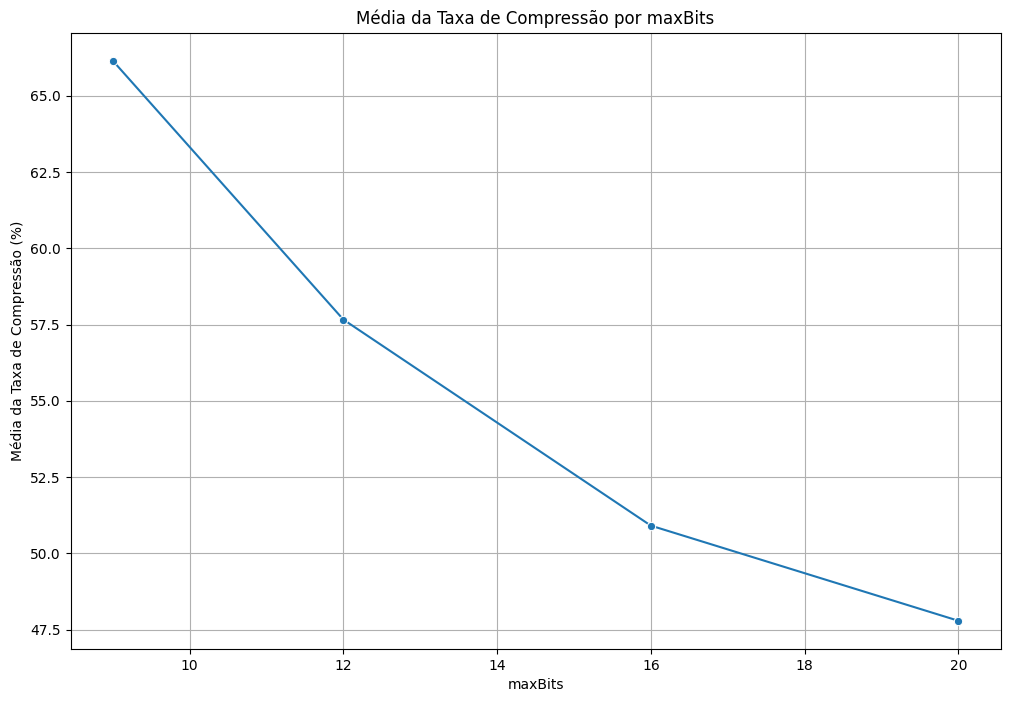

In [21]:
df_compressao = dados[dados['tipo'] == 'Compressão']
media_compressao = df_compressao.groupby('maxBits')['taxa'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(x='maxBits', y='taxa', data=media_compressao, marker='o')
plt.title('Média da Taxa de Compressão por maxBits')
plt.xlabel('maxBits')
plt.ylabel('Média da Taxa de Compressão (%)')
plt.grid(True)
plt.show()


A taxa de compressão dos dados aumenta a medida que diminuímos o tamanho máximo do código dos prefixos



---



- Como o tempo de execução varia de acordo com o maxBits?


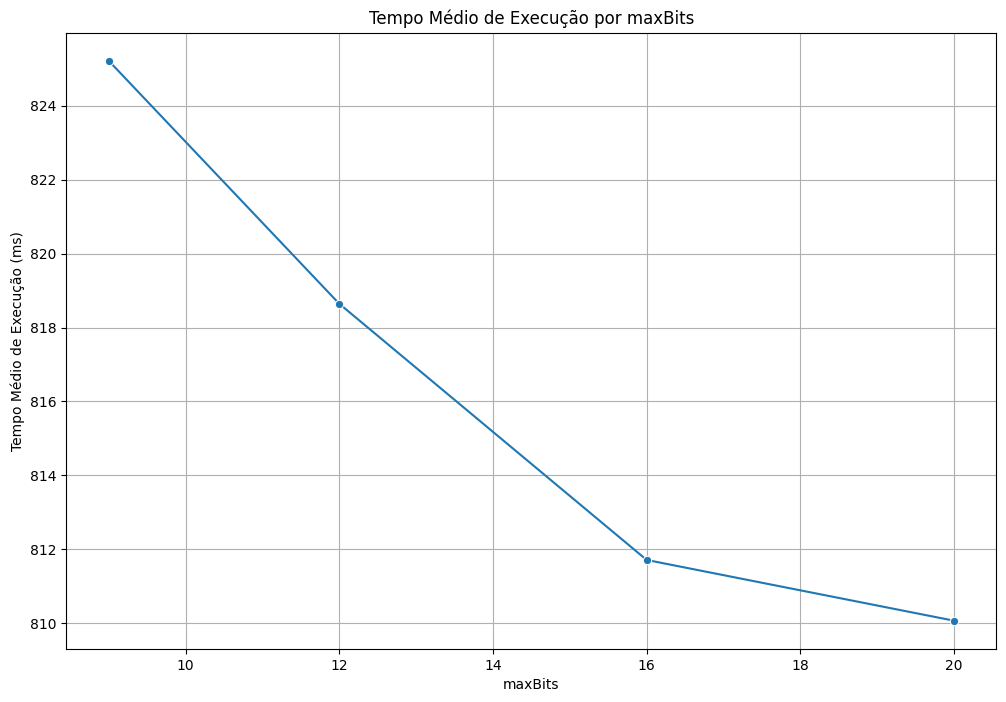

In [17]:
media_tempo = dados.groupby('maxBits')['tempo'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(x='maxBits', y='tempo', data=media_tempo, marker='o')
plt.title('Tempo Médio de Execução por maxBits')
plt.xlabel('maxBits')
plt.ylabel('Tempo Médio de Execução (ms)')
plt.grid(True)
plt.show()


O tempo médio de execução tanto para compressão quanto descompressão aumenta na medida que diminuímos nosso limitante de tamanho do código dos prefixos da árvore(maxBits)



---



- Como o tamanho medio do dicionario varia de acordo com o maxBits

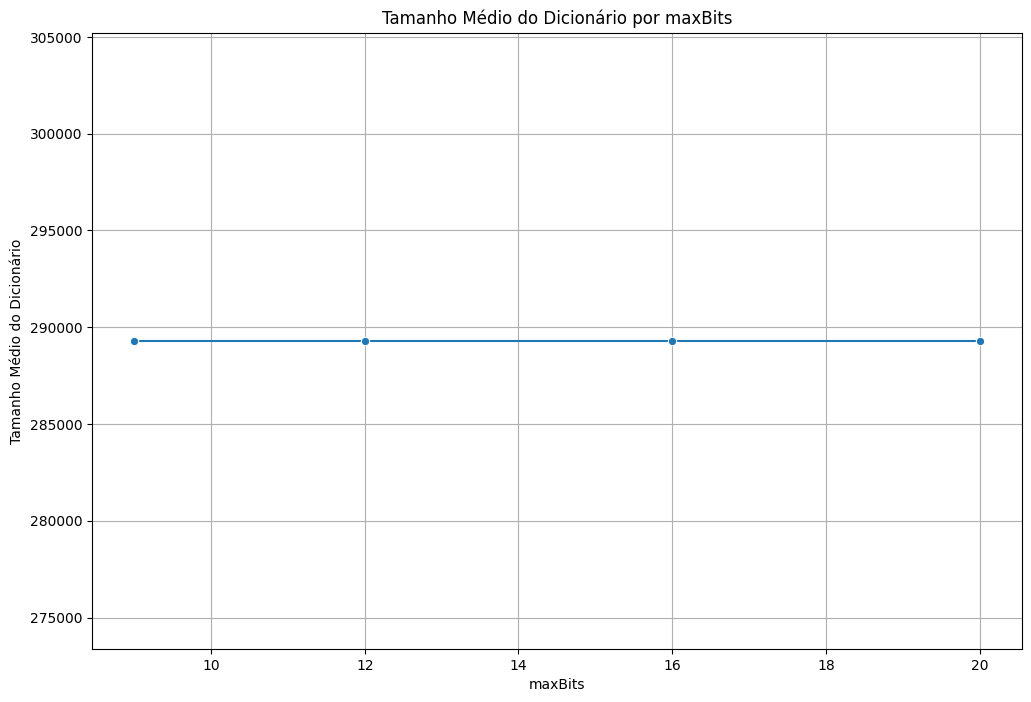

In [22]:
media_tamanho_dicionario = dados.groupby('maxBits')['tamanhoDicionario'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(x='maxBits', y='tamanhoDicionario', data=media_tamanho_dicionario, marker='o')
plt.title('Tamanho Médio do Dicionário por maxBits')
plt.xlabel('maxBits')
plt.ylabel('Tamanho Médio do Dicionário')
plt.grid(True)
plt.show()


O tamanho do dicionário não varia a medida que variamos nosso maxBits



---



- Tempo médio de Compressão VS Tempo médio de descompressão

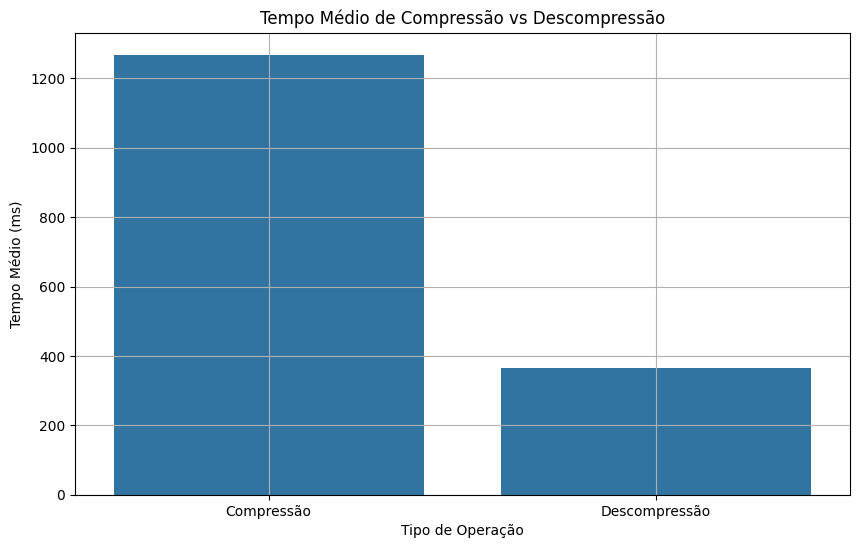

In [25]:
media_tempo_compressao = dados[dados['tipo'] == 'Compressão']['tempo'].mean()
media_tempo_descompressao = dados[dados['tipo'] == 'Descompressão']['tempo'].mean()

media_tempo = pd.DataFrame({
    'Tipo de Operação': ['Compressão', 'Descompressão'],
    'Tempo Médio (ms)': [media_tempo_compressao, media_tempo_descompressao]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Tipo de Operação', y='Tempo Médio (ms)', data=media_tempo)
plt.title('Tempo Médio de Compressão vs Descompressão')
plt.xlabel('Tipo de Operação')
plt.ylabel('Tempo Médio (ms)')
plt.grid(True)
plt.show()


A compressão gasta muito mais tempo independente do maxbits, tipo e tamanho dos dados.


---



- Qual a relação do tamanho do dicionário com o tempo classificados por tipo de processamento

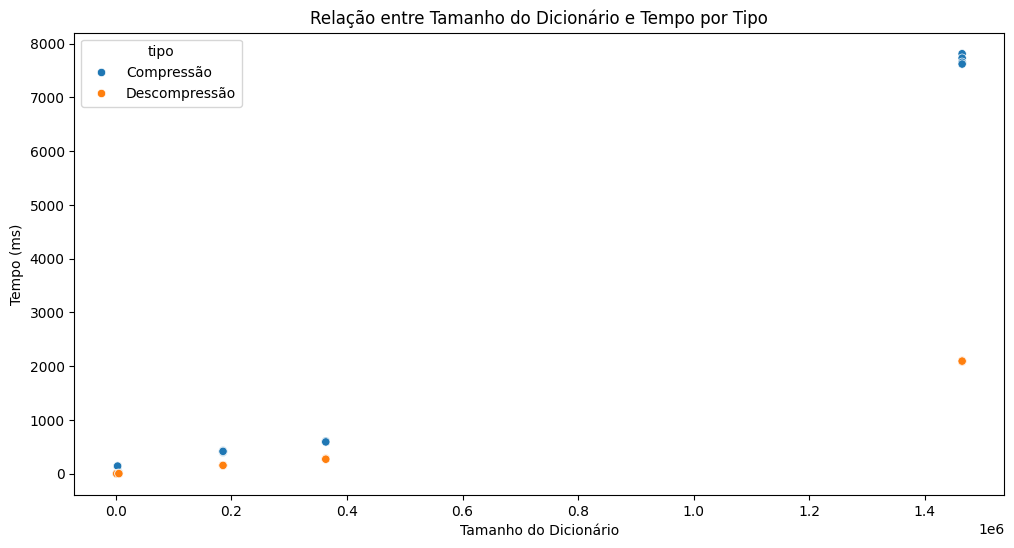

In [10]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dados, x='tamanhoDicionario', y='tempo', hue='tipo')
plt.title('Relação entre Tamanho do Dicionário e Tempo por Tipo')
plt.xlabel('Tamanho do Dicionário')
plt.ylabel('Tempo (ms)')
plt.show()

- A medida que aumentamos o tamanho do dicionário maior é o tempo de execução e maior é a diferença de tempo de execução entre compressão e descompressão para um mesmo arquivo



---

